In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
data=pd.read_csv("telcom_data.csv")

In [11]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [12]:
data.shape

(150001, 55)

In [59]:
data.info

<bound method DataFrame.info of            Bearer Id            Start  Start ms              End  End ms  \
0       1.311450e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311450e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311450e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311450e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311450e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277830e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349880e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311450e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311450e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN              NaN       NaN              NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number         

In [14]:
data.describe

<bound method NDFrame.describe of            Bearer Id            Start  Start ms              End  End ms  \
0       1.311450e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311450e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311450e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311450e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311450e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277830e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349880e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311450e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311450e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN              NaN       NaN              NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number       

# Observations:
We have 150001 rows and 55 columns in the data.

In [13]:
data['Handset Type'].value_counts(ascending=False).head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [15]:
data['Handset Manufacturer'].value_counts(ascending=False).head(10)

Apple                                   59565
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: Handset Manufacturer, dtype: int64

In [50]:
data.groupby(by= "Handset Manufacturer")["Handset Type"].value_counts().nlargest(10)

Handset Manufacturer  Handset Type                
Huawei                Huawei B528S-23A                19752
Apple                 Apple iPhone 6S (A1688)          9419
                      Apple iPhone 6 (A1586)           9023
undefined             undefined                        8987
Apple                 Apple iPhone 7 (A1778)           6326
                      Apple iPhone Se (A1723)          5187
                      Apple iPhone 8 (A1905)           4993
                      Apple iPhone Xr (A2105)          4568
Samsung               Samsung Galaxy S8 (Sm-G950F)     4520
Apple                 Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [17]:
# Identify the top 10 handsets used by customers
top_10_handsets = data['Handset Type'].value_counts().head(10)

# Identify the top 3 handset manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)

# Filter the data for the top 3 manufacturers
top_3_manufacturer_data = data[data['Handset Manufacturer'].isin(top_3_manufacturers.index)]

# Identify the top 5 handsets per top 3 handset manufacturers
top_5_handsets_per_manufacturer = top_3_manufacturer_data.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

# Print the results
print("Top 10 Handsets:")
print(top_10_handsets)

Top 10 Handsets:
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


#  Aggregate per user the following information in the column



In [18]:
d={"Xdr_Session":data["Bearer Id"],
   "Dur_msec":data['Dur. (ms)'],
   "Activity Duration DL (ms)":data["Activity Duration DL (ms)"],
   "Activity Duration UL (ms)":data['Activity Duration UL (ms)'],
   "Social Media DL (Bytes)":data["Social Media DL (Bytes)"],
   "Social Media UL (Bytes)":data["Social Media UL (Bytes)"],
   "YouTube DL (Bytes)":data["Youtube DL (Bytes)"],
   "YouTube UL (Bytes)":data["Youtube UL (Bytes)"],
   "Netflix DL (Bytes)":data["Netflix DL (Bytes)"],
   "Netflix UL (Bytes)":data["Netflix UL (Bytes)"],
   "Google DL (Bytes)":data["Google DL (Bytes)"],
   "Google UL (Bytes)":data["Google UL (Bytes)"],
   "Google UL (Bytes)":data["Google UL (Bytes)"],
   "Email DL (Bytes)":data["Email DL (Bytes)"],
   "Email UL (Bytes)":data["Email UL (Bytes)"],
   "Gaming DL (Bytes)":data["Gaming DL (Bytes)"],
   "Gaming UL (Bytes)":data["Gaming UL (Bytes)"],
   "Other DL":data["Other DL (Bytes)"],
   "Other UL":data["Other UL (Bytes)"],
  "total_DL_vol(bytes)":data['Total DL (Bytes)'],
   "total_Ul_vol(bytes)":data["Total UL (Bytes)"]}

In [21]:
df=pd.DataFrame(d)

In [23]:
df

,Xdr_Session,Dur_msec,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),YouTube DL (Bytes),YouTube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL,Other UL,total_DL_vol(bytes),total_Ul_vol(bytes)
0,1.311450e+19,1823652.0,37624.0,38787.0,1545765.000,24420.00000,15854611.0,2501332.00,8198936.00,9656251.00,1634479.000,1271433.000,3563542.000,137762.0000,278082303.0,1.434415e+07,171744450.0,8.814393e+06,308879636.0,36749741.0
1,1.311450e+19,1365104.0,168.0,3560.0,1926113.000,7165.00000,20247395.0,19111729.00,18338413.00,17227132.00,3493924.000,920172.000,629046.000,308339.0000,608750074.0,1.170709e+06,526904238.0,1.505514e+07,653384965.0,53800391.0
2,1.311450e+19,1361762.0,0.0,0.0,1684053.000,42224.00000,19725661.0,14699576.00,17587794.00,6163408.00,8535055.000,1694064.000,2690151.000,672973.0000,229584621.0,3.956300e+05,410692588.0,4.215763e+06,279807335.0,27883638.0
3,1.311450e+19,1321509.0,3330.0,37882.0,644121.000,13372.00000,21388122.0,15146643.00,13994646.00,1097942.00,9023734.000,2788027.000,1439754.000,631229.0000,799538153.0,1.084972e+07,749039933.0,1.279728e+07,846028530.0,43324218.0
4,1.311450e+19,1089009.0,0.0,0.0,862600.000,50188.00000,15259380.0,18962873.00,17124581.00,415218.00,6248284.000,1500559.000,1936496.000,173853.0000,527707248.0,3.529801e+06,550709500.0,1.391032e+07,569138589.0,38542814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,81230.0,42376.0,41915.0,3464974.000,52091.00000,16191667.0,11763428.00,17883703.00,19678161.00,9967603.000,2817311.000,57639.000,633237.0000,526609673.0,9.197207e+06,3264510.0,1.348742e+07,574175259.0,57628851.0
149997,7.349880e+18,97970.0,17264.0,16759.0,2344568.000,7613.00000,13877234.0,8288284.00,19350146.00,21293148.00,2229420.000,2185941.000,1954414.000,167304.0000,626893062.0,4.735033e+06,712180387.0,2.457758e+06,666648844.0,39135081.0
149998,1.311450e+19,98249.0,25003.0,28640.0,1245845.000,14394.00000,22660510.0,1855903.00,9963942.00,5065760.00,3850890.000,2734579.000,1525734.000,532543.0000,553539484.0,1.339432e+07,121100856.0,1.131473e+07,592786405.0,34912224.0
149999,1.311450e+19,97910.0,13405.0,34088.0,801547.000,21562.00000,8817106.0,8305402.00,3322253.00,13172589.00,4189773.000,3567494.000,2228270.000,622644.0000,352536971.0,2.529475e+06,814713113.0,1.406930e+06,371895920.0,29626096.0


#  number of xDR sessions



In [24]:
len(df['Xdr_Session'])

150001

##### the total download (DL) and upload (UL) data



In [30]:
a=pd.DataFrame(df.groupby(by= ["Activity Duration DL (ms)","Activity Duration UL (ms)"])["Dur_msec"].count())

In [31]:
a

Dur_msec
Activity Duration DL (ms) Activity Duration UL (ms)          
0.0                       0.0                            4540
                          1.0                              26
                          2.0                              20
                          3.0                              14
                          4.0                              17
...                                                       ...
86393579.0                86397048.0                        1
86396487.0                86385896.0                        1
86401708.0                86397346.0                        1
87188182.0                83131277.0                        1
136536461.0               82889939.0                        1

[144112 rows x 1 columns]

In [63]:
# Total Activity upload and download

sns.jointplot(df['Activity Duration DL (ms)'],df['Activity Duration UL (ms)'],color="red",kind='scatter')
plt.xlabel('Activity Duration DL (ms)')
plt.ylabel('Activity Duration UL (ms)')
plt.show()

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

##### the total data volume (in Bytes) during this session for each application



In [58]:
names=['Social Media DL (Bytes)','Social Media UL (Bytes)','YouTube DL (Bytes)','YouTube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL','Other UL','total_DL_(bytes)','total_Ul_(bytes)']
values=[df['Social Media DL (Bytes)'].sum(),df['Social Media UL (Bytes)'].sum(),df['YouTube DL (Bytes)'].sum(),df['YouTube UL (Bytes)'].sum(),df['Netflix DL (Bytes)'].sum(),df['Netflix UL (Bytes)'].sum(),df['Google DL (Bytes)'].sum(),df['Google UL (Bytes)'].sum(),df['Email DL (Bytes)'].sum(),df['Email UL (Bytes)'].sum(),df['Gaming DL (Bytes)'].sum(),df['Gaming UL (Bytes)'].sum(),df['Other DL'].sum(),df['Other UL'].sum(),df['total_DL_vol(bytes)'].sum(),df['total_Ul_vol(bytes)'].sum()]

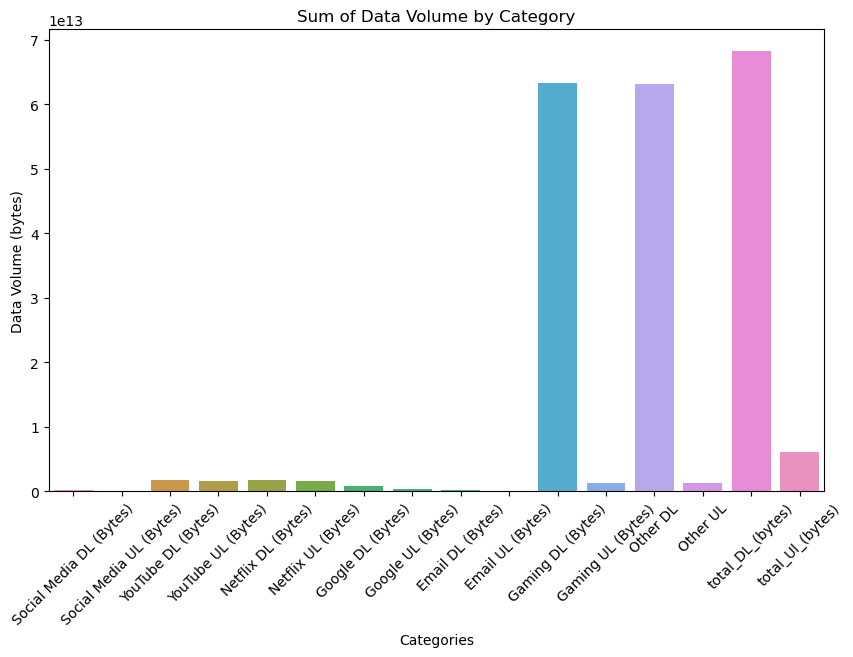

In [35]:
# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=names, y=values)
plt.xlabel('Categories')
plt.ylabel('Data Volume (bytes)')
plt.title('Sum of Data Volume by Category')
# Rotate the x-axis labels if needed
plt.xticks(rotation=45)
plt.savefig('Sum of Data Volume by Category.png')
# Display the chart
plt.show()

######  Maximum amount of data volume consumed by applications are Total_DL_(Bytes), Gaming_UL_(Bytes),Email_UL_(Bytes)

In [36]:
# Grouping the application as per duration in ms consumed

In [37]:
grouped_df=df.groupby(by=['Dur_msec','Social Media DL (Bytes)','Social Media UL (Bytes)','YouTube DL (Bytes)','YouTube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL','Other UL','total_DL_vol(bytes)','total_Ul_vol(bytes)'])['Dur_msec'].sum().sort_values(ascending=False)

In [38]:
b=pd.DataFrame(grouped_df)

In [39]:
b

,,,,,,,,,,,,,,,,,Dur_msec
Dur_msec,Social Media DL (Bytes),Social Media UL (Bytes),YouTube DL (Bytes),YouTube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL,Other UL,total_DL_vol(bytes),total_Ul_vol(bytes),
1859336.0,2701953.0,8961.0,10163169.0,6427023.0,19192742.0,21799809.0,1498463.0,307216.0,194386.0,739735.0,236781692.0,1839956.0,273131802.0,4844901.0,270532405.0,35967601.0,1859336.0
1859327.0,627028.0,48866.0,11795585.0,3798756.0,5359834.0,7098414.0,9075232.0,1902888.0,2785411.0,608252.0,828368274.0,16333321.0,365492157.0,3041753.0,858011364.0,32832250.0,1859327.0
1823652.0,1545765.0,24420.0,15854611.0,2501332.0,8198936.0,9656251.0,1634479.0,1271433.0,3563542.0,137762.0,278082303.0,14344150.0,171744450.0,8814393.0,308879636.0,36749741.0,1823652.0
1772931.0,859133.0,65305.0,3649875.0,7425183.0,21943878.0,10618913.0,7195764.0,280142.0,261404.0,81219.0,319118338.0,14590933.0,74538623.0,12788921.0,353028392.0,45850616.0,1772931.0
1686493.0,3363967.0,13568.0,19240610.0,19536043.0,4567263.0,2128171.0,3900380.0,4015803.0,2710625.0,895048.0,382902598.0,2029871.0,60372214.0,7139029.0,416685443.0,35757533.0,1686493.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7258.0,2443771.0,48286.0,21456183.0,13693316.0,229311.0,13409943.0,9311637.0,704362.0,1399574.0,230311.0,755864149.0,11701779.0,221966892.0,6166979.0,790704625.0,45954976.0,7258.0
7212.0,2797137.0,13837.0,2292574.0,16267121.0,18108034.0,4863883.0,2545140.0,776921.0,124272.0,800938.0,84332620.0,6793938.0,136763971.0,748096.0,110199777.0,30264734.0,7212.0
7189.0,3411184.0,20606.0,4021769.0,18356290.0,17318394.0,15030318.0,4295782.0,1162852.0,796828.0,232152.0,188548890.0,15125404.0,772185484.0,11484060.0,218392847.0,61411682.0,7189.0


In [41]:
b.shape

(150000, 1)